<h1>EDA, Visualización de Datos<h1>  

<h3>Objetivo</h3>
Este notebook tiene como objetivo realizar un análisis visual general de los datos. Para ello se realizara una visualización de distribuciones, histogramas para las variables relevantes y un gráfico de líneas para exploración temporal de los datos.También usaremos un 2 graficos de barras para visualizar la participación de diferentes roles en los siniestros, y finalmente haremos un diagrama de dispersión para analizar la relación entre víctimas y acusados

<h3>Importación de Librerías</h3>
Importaremos pandas, matplotlib y seaborn para realizar esta visualización de datos  

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Carga de dataset</h3>
Cargamos el dataset en 2 dataframes, uno con victimas y otro con hechos

In [28]:
dfVictimas=pd.read_excel("../Dataset_Original/homicidios.xlsx", sheet_name="VICTIMAS")
dfHechos=pd.read_excel("../Dataset_Original/homicidios.xlsx", sheet_name="HECHOS")

<h3>Visualización de Distribuciones</h3>
Este histograma visualiza la distribución de las edades de las víctimas de siniestros viales, proporcionando información sobre la concentración de edades y posibles patrones.

Reemplazamos "SD" con NaN y convertir la columna 'EDAD' a numérica

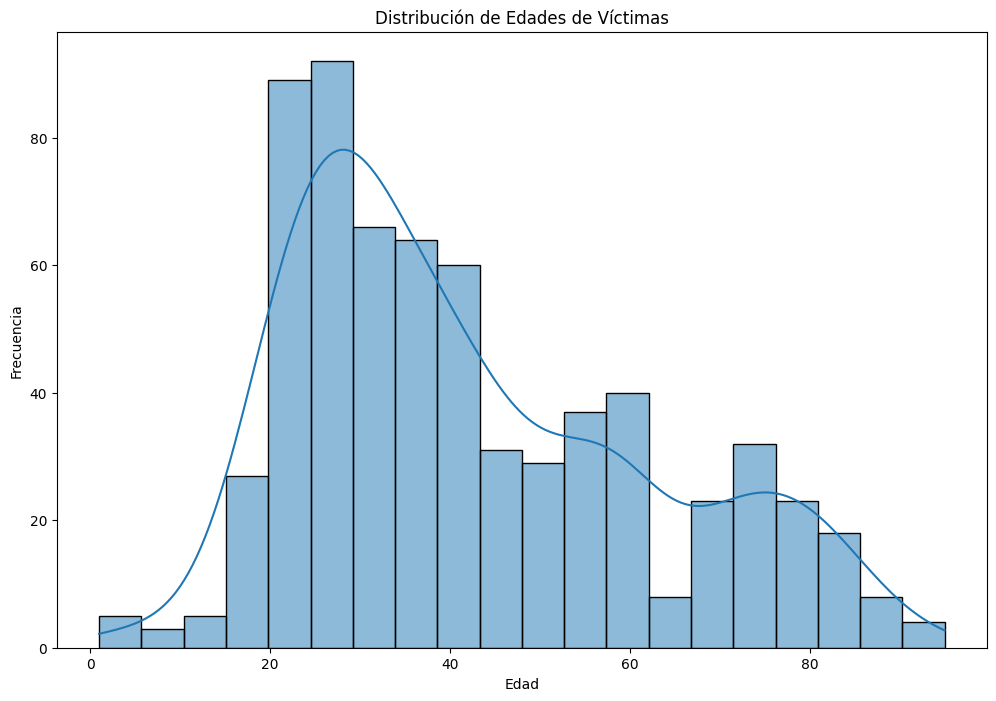

In [29]:
dfVictimas['EDAD'] = pd.to_numeric(dfVictimas['EDAD'], errors='coerce')

#creamos
plt.figure(figsize=(12, 8))
sns.histplot(dfVictimas['EDAD'].dropna(), bins=20, kde=True)
plt.title('Distribución de Edades de Víctimas')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

Se puede apreciar como la mayoría de las víctimas tienen entre 20 y 40 años

<h3>Exploración Temporal</h3>
Este gráfico de líneas muestra la evolución temporal de los siniestros viales, destacando posibles tendencias a lo largo del tiempo, lo cual puede ser útil para identificar patrones estacionales o cambios a lo largo de los años.

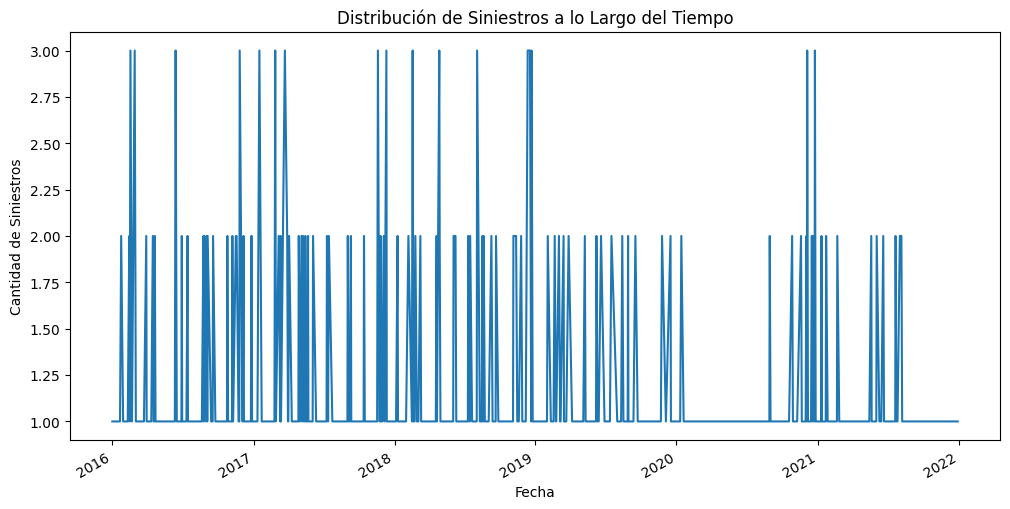

In [30]:
plt.figure(figsize=(12, 6))
dfVictimas['FECHA'].value_counts().sort_index().plot()
plt.title('Distribución de Siniestros a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Siniestros')
plt.show()

Vemos que lo más comun es que haya un siniestro diario. También ocurre en varías ocaciones que hay 2 siniestros por día, y solamente en 17 ocaciones han habido 3 siniestros en un día

<h3>Gráfico de Barras para Víctimas</h3>
Este gráfico de barras muestra la frecuencia de víctimas de siniestros viales en cada categoría específica, proporcionando una perspectiva clara de las categorías más frecuentes en el conjunto de datos.

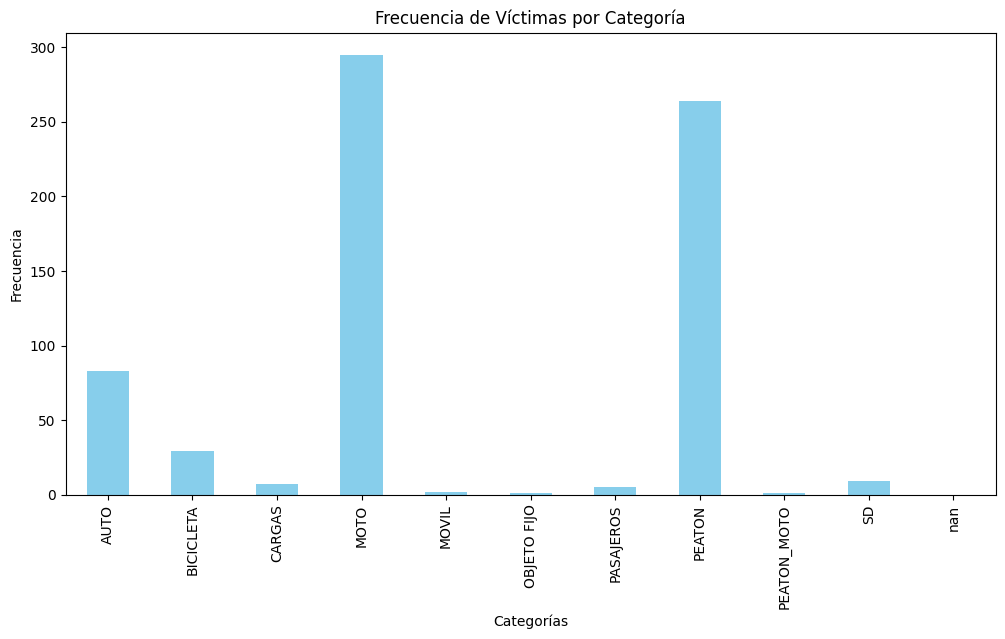

In [31]:
plt.figure(figsize=(12, 6))

dummy_victima = pd.get_dummies(dfHechos['VICTIMA'], dummy_na=True)#creamos variables dummy para la columna VICTIMA
victima_counts = dummy_victima.sum()

#creamos el gráfico de barras
victima_counts.plot(kind='bar', color='skyblue')
plt.title('Frecuencia de Víctimas por Categoría')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.show()

Notamos que con diferencia las víctimas más frecuentes son motos y peatones. Luego de Autos con más de 3 veces la frecuencia de estos 

<h3>Gráfico de Barras para Acusados</h3>
Este gráfico de barras presenta la frecuencia de acusados en siniestros viales según cada categoría específica, permitiendo identificar las categorías con mayor incidencia de acusaciones.

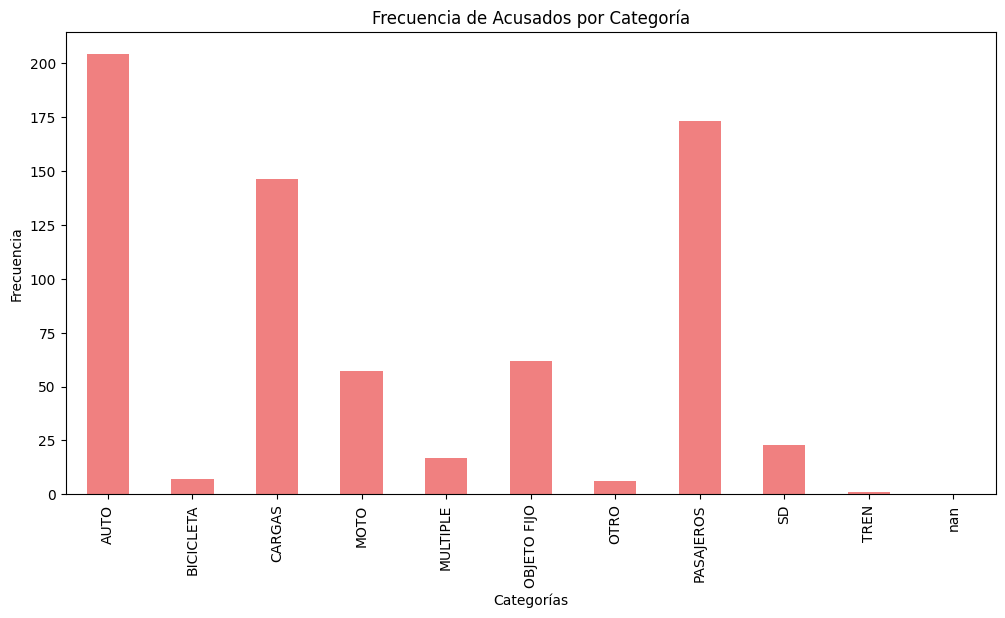

In [32]:
plt.figure(figsize=(12, 6))

dummy_acusado = pd.get_dummies(dfHechos['ACUSADO'], dummy_na=True)#creamos variables dummy para la columna ACUSADO
acusado_counts = dummy_acusado.sum()

#creamos el gráfico de barras
acusado_counts.plot(kind='bar', color='lightcoral')
plt.title('Frecuencia de Acusados por Categoría')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.show()

Es visible como los autos, luego los pasajeros y en tercer lugar los cargas son con diferencia los acusados más frecuentes en el total de los siniestros

<h3>Relación entre Víctimas y Acusados</h3>
Este gráfico de dispersión visualiza la relación entre el número de víctimas y acusados en siniestros viales. Cada punto representa un incidente, permitiendo identificar patrones en la relación entre el número de víctimas y acusados en cada incidente. Este análisis podría revelar tendencias, como si hay casos en los que el número de acusados es proporcional al número de víctimas o si existen situaciones atípicas.

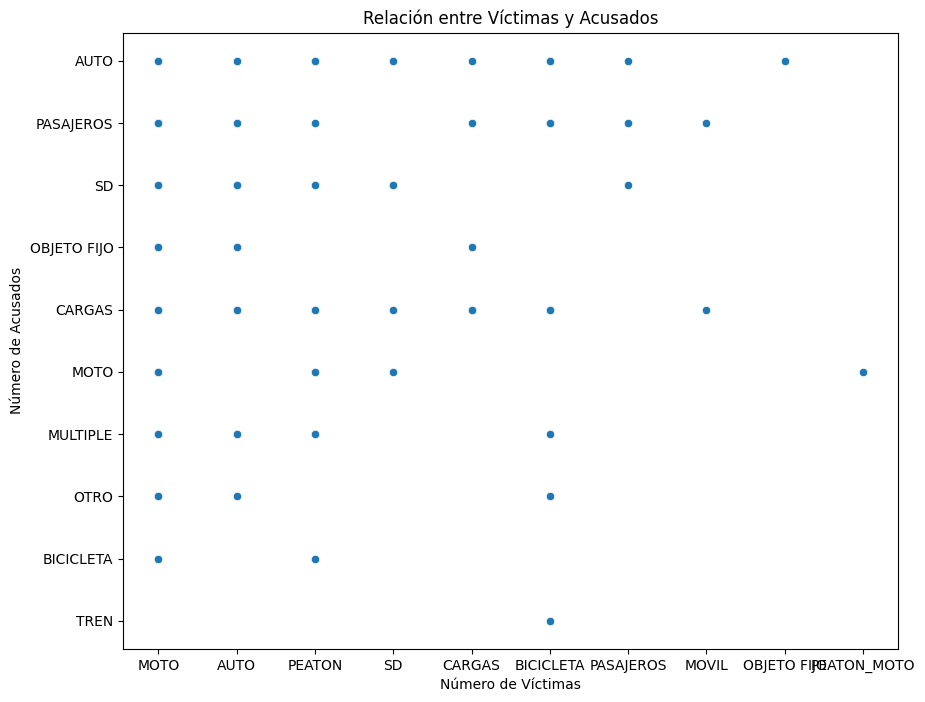

In [33]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='VICTIMA', y='ACUSADO', data=dfHechos)
plt.title('Relación entre Víctimas y Acusados')
plt.xlabel('Número de Víctimas')
plt.ylabel('Número de Acusados')
plt.show()

Con este gráfico de distribución vemos, por un lado, como los pasajeros, los autos y los cargas son las categorías de acusados que mas se relacionan con casi todas las categorías de víctimas, mientras que los trenes y las bicicletas están en el otro extremo. Por otro lado entendemos que las motos son las principales víctimas, relacionandose con casi todas las categorías de acusados; seguidas por los autos y los peatones. Además vemos que los móviles son muy pocas veces víctimas en estos siniestros viales